# 1) Introduction to data

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more.So we have to predict the price of used cars based on wide range of attributes and features.And our aim is to develop a model that accurately estimates the price of different cars.

# 2) Modeules Required

In [133]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

# 3) Basic info about dataset


In [134]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [135]:
# check Missing value
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [136]:
# Check Duplication
data.duplicated().sum()

2

In [137]:
data.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [138]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Feature Engineering

In [139]:
# Creating a new feature called 'car_age',to know how many years old the car is.
data['car_age'] = 2023-data['Year']
data.drop('Year',axis=1,inplace=True)

In [140]:
data.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


## EDA

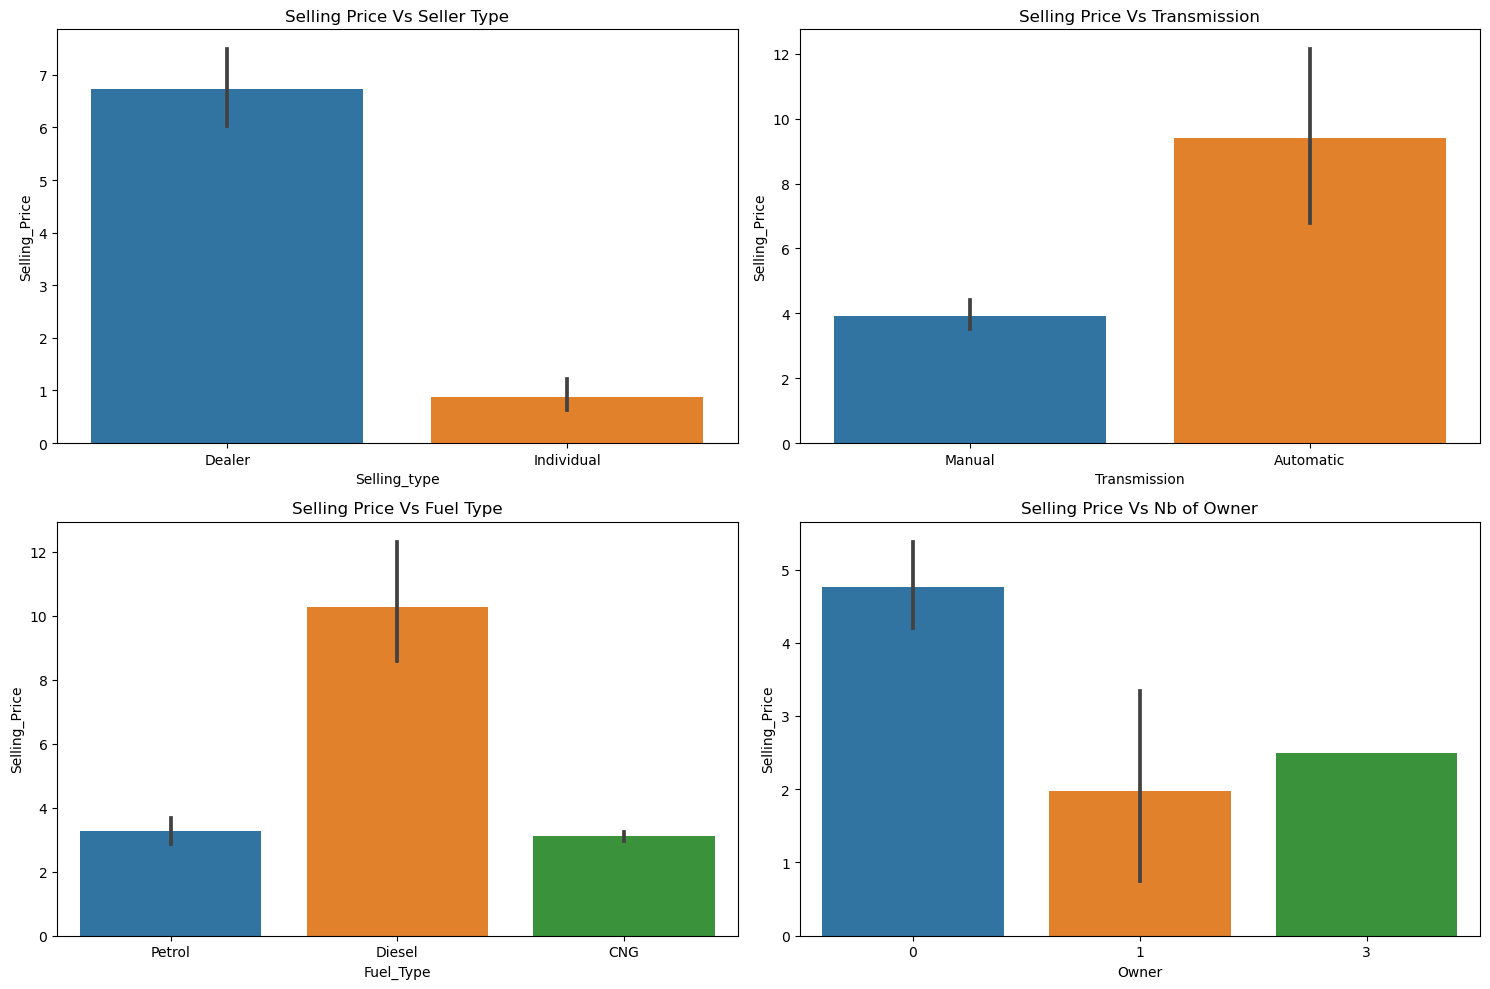

In [141]:
# data visualisation
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=data,x='Selling_type',y='Selling_Price')
plt.title('Selling Price Vs Seller Type')

plt.subplot(2,2,2)
sns.barplot(data=data,x='Transmission',y='Selling_Price')
plt.title('Selling Price Vs Transmission')

plt.subplot(2,2,3)
sns.barplot(data=data,x='Fuel_Type',y='Selling_Price')
plt.title('Selling Price Vs Fuel Type')

plt.subplot(2,2,4)
sns.barplot(data=data,x='Owner',y='Selling_Price')
plt.title('Selling Price Vs Nb of Owner')
plt.tight_layout()
plt.show()


### Observations :
1) selling price is higher when sold by dealers
2) automatic cars has higher selling price
3) cars using diesel has higher selling price
4) cars which are used less by owners has higher selling price

Text(0.5, 1.0, 'Selling Price Vs Car Age')

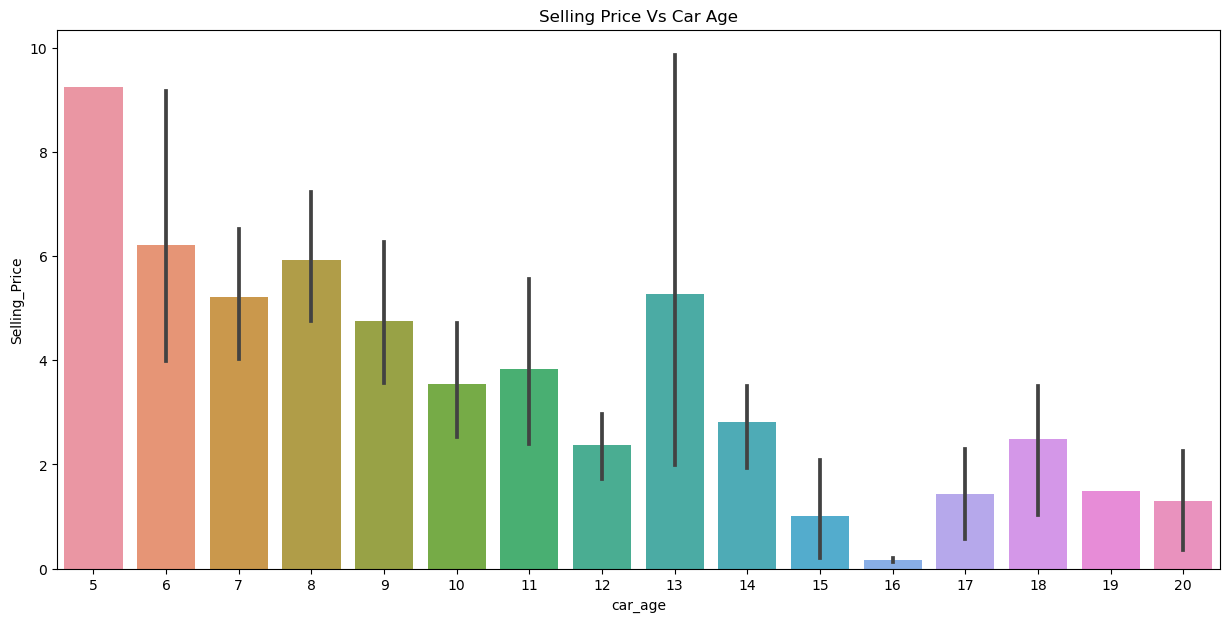

In [142]:
plt.figure(figsize=(15,7))
sns.barplot(data=data,x='car_age',y='Selling_Price')
plt.title('Selling Price Vs Car Age')

### observation :
1) cars which are used very less (like 5 years) has highest selling price.
And the selling price gradually decreses as the number of years of car age increases.

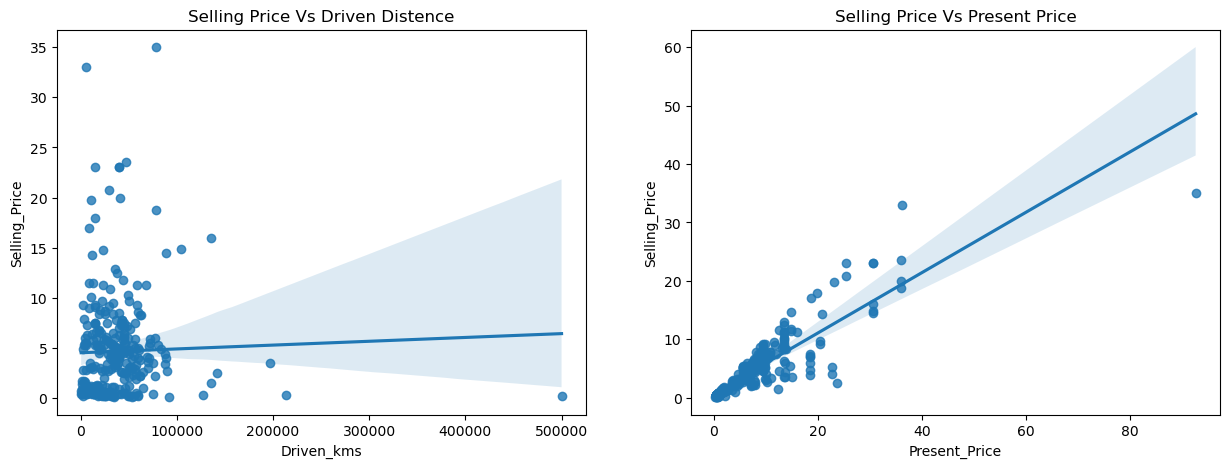

In [143]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.regplot(data=data,x='Driven_kms',y='Selling_Price')
plt.title('Selling Price Vs Driven Distence')

plt.subplot(1,2,2)
sns.regplot(data=data,x='Present_Price',y='Selling_Price')
plt.title('Selling Price Vs Present Price')
plt.show()


### Observations :
1) selling price is higher of cars which are driven less
2) as the present price of cars increases leads to the increment in selling price

In [144]:
# dealing with categorical variables

cat_col = ['Fuel_Type','Selling_type','Transmission','Car_Name']
for i in cat_col:
    print(data[i].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 

In [145]:
# creating dummies
cols= ['Fuel_Type','Selling_type','Transmission']
data_1 = pd.concat([data]+[pd.get_dummies(data[i], drop_first=True, prefix= i+'_') for i in cols], axis=1)
data_1.drop(['Fuel_Type','Selling_type','Transmission','Car_Name'],axis=1,inplace=True)
data_1.head()

,Selling_Price,Present_Price,Driven_kms,Owner,car_age,Fuel_Type__Diesel,Fuel_Type__Petrol,Selling_type__Individual,Transmission__Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [146]:
#checking multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_1[['Present_Price','Driven_kms','Owner','car_age','Fuel_Type__Diesel','Fuel_Type__Petrol','Selling_type__Individual','Transmission__Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.211044,Present_Price
1,2.888998,Driven_kms
2,1.086964,Owner
3,16.194782,car_age
4,5.395420,Fuel_Type__Diesel
5,16.933491,Fuel_Type__Petrol
6,2.231970,Selling_type__Individual
7,8.440614,Transmission__Manual


In [147]:
# car_age and Fuel_Type__Petrol has high vif
data_1_new = data_1.drop(['Driven_kms','Fuel_Type__Petrol'],axis=1)
data_1_new.head()

,Selling_Price,Present_Price,Owner,car_age,Fuel_Type__Diesel,Selling_type__Individual,Transmission__Manual
0,3.35,5.59,0,9,0,0,1
1,4.75,9.54,0,10,1,0,1
2,7.25,9.85,0,6,0,0,1
3,2.85,4.15,0,12,0,0,1
4,4.60,6.87,0,9,1,0,1


In [148]:
# cheking again after removing some correlated feature
variables = data_1[['Present_Price','Driven_kms','Owner','Fuel_Type__Diesel','Selling_type__Individual','Transmission__Manual']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,2.200856,Present_Price
1,1.883550,Driven_kms
2,1.065891,Owner
3,1.669331,Fuel_Type__Diesel
4,1.748706,Selling_type__Individual
5,2.465837,Transmission__Manual


### Obserations :
1) Now we have VIF<5 for all variables and hence there is no to very little multicollinearity in our model

## Feature Selection

<Axes: >

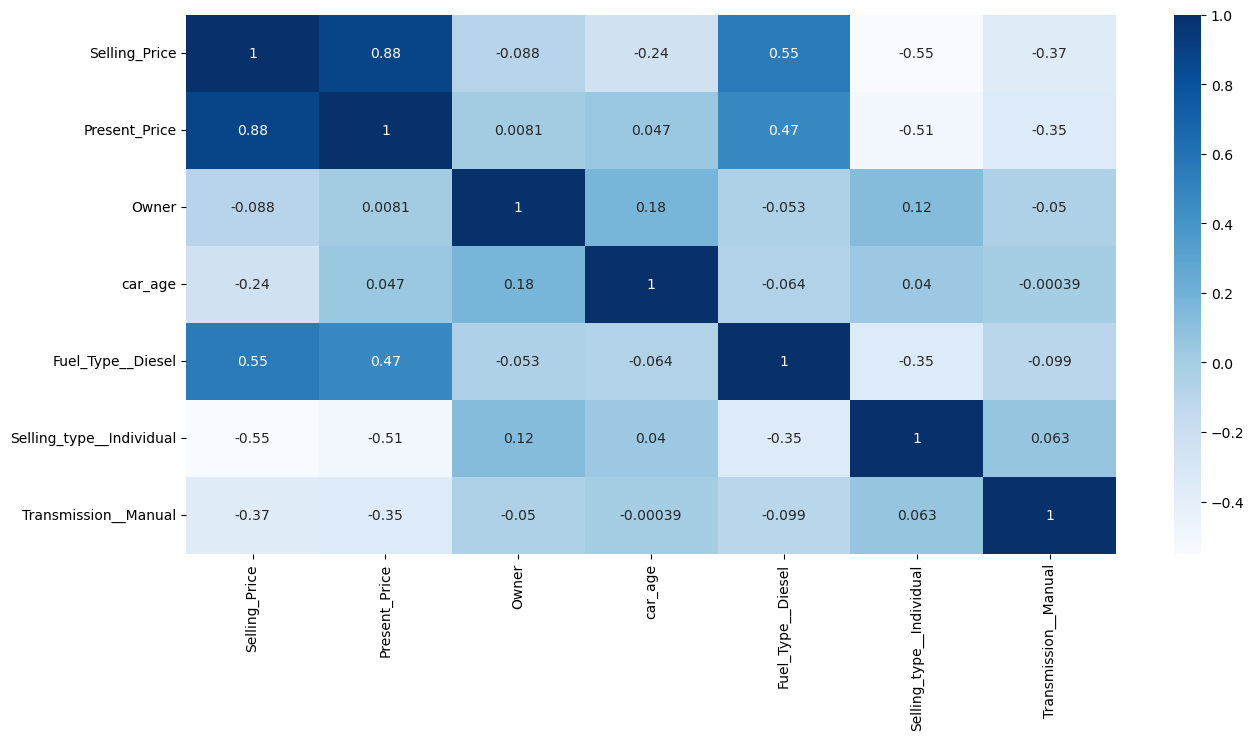

In [149]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_1_new.corr(), annot=True,cmap='Blues')

#### Feature Importance
Feature importance gives score for each feature of the data, the higher the score more relevant is the feature towards our Target variable.

In [150]:
x = data_1_new.drop('Selling_Price',axis=1)
y = data_1_new['Selling_Price']

In [151]:
# Relevant feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
etree = ExtraTreesRegressor()
etree.fit(x,y)

ExtraTreesRegressor()

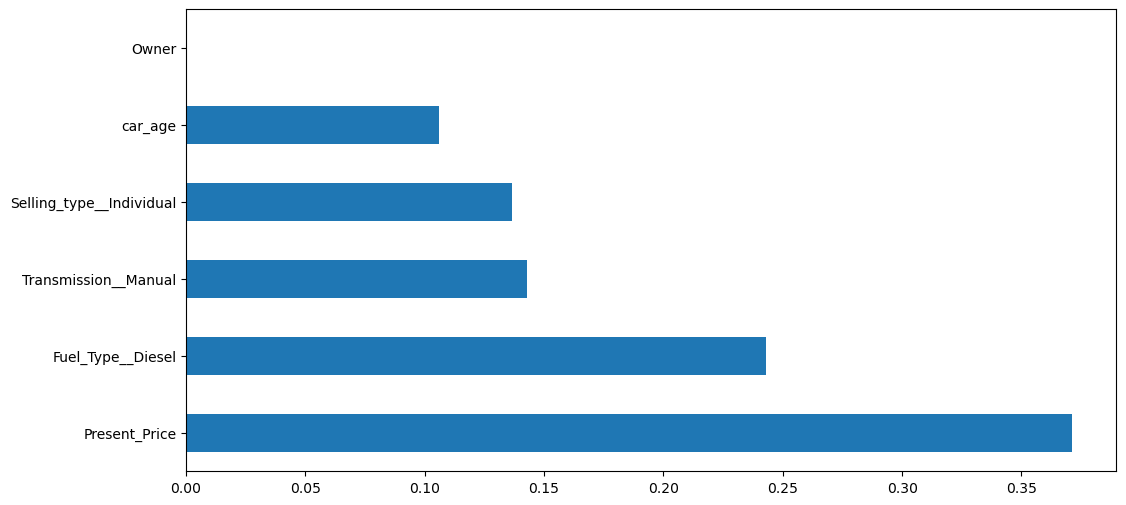

In [152]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(etree.feature_importances_, index=x.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

### Observation :
1) We can remove the feature owner, it's not relevant at all.

In [153]:
data_1_new.drop('Owner', axis=1)

,Selling_Price,Present_Price,car_age,Fuel_Type__Diesel,Selling_type__Individual,Transmission__Manual
0,3.35,5.59,9,0,0,1
1,4.75,9.54,10,1,0,1
2,7.25,9.85,6,0,0,1
3,2.85,4.15,12,0,0,1
4,4.60,6.87,9,1,0,1
...,...,...,...,...,...,...
296,9.50,11.60,7,1,0,1
297,4.00,5.90,8,0,0,1
298,3.35,11.00,14,0,0,1
299,11.50,12.50,6,1,0,1


# Model Development

In [154]:
X = data_1_new.drop('Selling_Price', axis=1)
Y= data_1_new['Selling_Price']

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((240, 6), (240,), (61, 6), (61,))

In [156]:
pip install xgboost

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [158]:
res = pd.DataFrame()

lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()

Models= [lr, dtr, rfr, gb, xgb]

for model in Models: 
    print('Model is: {}'.format(model))
    m = model.fit(X_train,Y_train)
    print('Training score : {}'.format(m.score(X_train,Y_train)))
    Y_pred = m.predict(X_test)
    print('Predictions are : {}'.format(Y_pred))
    
    r2score = r2_score(Y_test,Y_pred)
    print('R2 score is : {}'.format(r2score))

    mae = mean_absolute_error(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
    print('MAE : {}'.format(mae))
    print('MSE : {}'.format(mse))
    print('RMSE : {}'.format(rmse))

    model_dict = {'Model Name' : model, 'R2 score':r2score,'MAE' : mae,'MSE' : mse,'RMSE' : rmse}
    res = res.append(model_dict,ignore_index=True)
    print(res)
    print('_'*75)
    

Model is: LinearRegression()
Training score : 0.8864486769174419
Predictions are : [ 2.92356289  8.13087595  6.43613224 -1.50481447  9.07797061  7.43055777
  1.3759747   0.72305578  1.3774343   7.47195734  9.0207257   0.57587502
  8.19544413  3.29789724  6.83618208  3.19769311  0.29583084 10.69102773
  1.77748414  2.32608146  0.25871719  8.03633161  6.43613224  2.4404526
  0.77020087  3.61196742  5.3449373   2.74903859  2.17607438  1.78888229
  0.28314692  9.20775354 -0.84714217  2.16606105  8.63207401  4.50207135
  7.39360541  7.47777125  2.99196912  7.84781967  3.77318686  4.32780913
  4.24491635  0.69305437  7.29769436  0.46015527  7.33077627 11.21974871
  3.07340153  5.31750802  6.66391232  2.17607438 20.55294695 16.82283285
  7.63628177  9.66414679  4.34495204  8.97923325  1.55882761  7.47832935
  0.19442845]
R2 score is : 0.8471700618300826
MAE : 1.2374373756543653
MSE : 3.520526957943866
RMSE : 1.876306733437757
           Model Name  R2 score       MAE       MSE      RMSE
0  Li

In [159]:
res

,Model Name,R2 score,MAE,MSE,RMSE
0,LinearRegression(),0.847170,1.237437,3.520527,1.876307
1,DecisionTreeRegressor(),0.952689,0.631230,1.089840,1.043954
2,"(DecisionTreeRegressor(max_features=1.0, rando...",0.961602,0.593560,0.884527,0.940493
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.971329,0.498912,0.660464,0.812690
4,"XGBRegressor(base_score=None, booster=None, ca...",0.965500,0.525138,0.794725,0.891473


### Model Comparision

In [160]:
models = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor']

result = pd.DataFrame({'Models':models})
result['R2 score'] = res['R2 score']
result['MAE'] = res['MAE']
result['MSE'] = res['MSE']
result['RMSE'] = res['RMSE']
result = result.sort_values(by='R2 score',ascending=False)
result

,Models,R2 score,MAE,MSE,RMSE
3,GradientBoostingRegressor,0.971329,0.498912,0.660464,0.812690
4,XGBRegressor,0.965500,0.525138,0.794725,0.891473
2,RandomForestRegressor,0.961602,0.593560,0.884527,0.940493
1,DecisionTreeRegressor,0.952689,0.631230,1.089840,1.043954
0,LinearRegression,0.847170,1.237437,3.520527,1.876307


## Conclusions
1) Cars of Automatic type is of high priced than of Manual type
2) Cars using Diesel as fuel type is of higher selling price
3) car age tells that older the car lesser the seling price
4) cars sold by dealers are of higher price than those sold by individuals
5) cars which are used less by owners tends to have higher selling price